In [37]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import random
import torch

from src.action import Action
from src.agent import Agent
from src.config import Config
from src.episode import Episode
from src.policy import Policy
from src.state import State
from src.world import World
import src.utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random agent action history
----

In [38]:
episode = Episode.new()
episode.run_steps_by_random(steps=20)

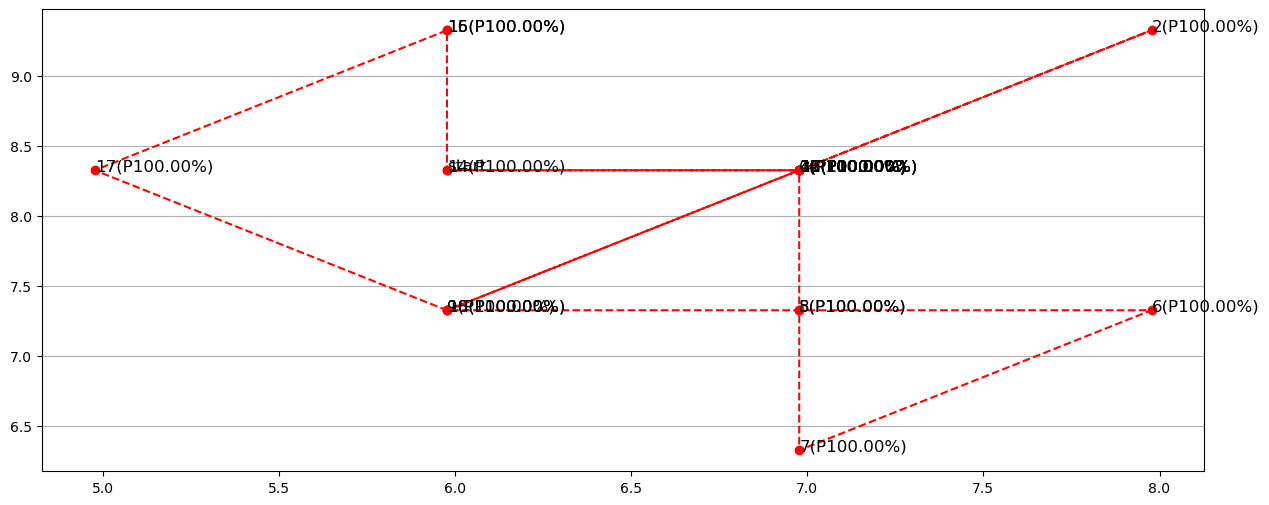

In [39]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()

# Policy Guide agent action history
----

In [40]:
episode = Episode.new()
policy = Policy(config=episode.config)

episode.run_steps_by_policy(steps=20, policy=policy, debug=True)
print(f"episode gain: {episode.gain()}")

step: 0, logit_prob: tensor([0.7272]), top_k_prob: tensor([0.7280]), action_idx: tensor([5]), state: tensor([ 7.6766, -8.1393])
step: 1, logit_prob: tensor([0.1142]), top_k_prob: tensor([0.1144]), action_idx: tensor([4]), state: tensor([ 7.6766, -8.1393])
step: 2, logit_prob: tensor([0.1142]), top_k_prob: tensor([0.1144]), action_idx: tensor([4]), state: tensor([ 7.6766, -8.1393])
step: 3, logit_prob: tensor([0.0594]), top_k_prob: tensor([0.0595]), action_idx: tensor([3]), state: tensor([ 7.6766, -9.1393])
step: 4, logit_prob: tensor([0.7272]), top_k_prob: tensor([0.7280]), action_idx: tensor([5]), state: tensor([ 7.6766, -8.1393])
step: 5, logit_prob: tensor([0.7073]), top_k_prob: tensor([0.7085]), action_idx: tensor([5]), state: tensor([ 7.6766, -7.1393])
step: 6, logit_prob: tensor([0.6842]), top_k_prob: tensor([0.6861]), action_idx: tensor([5]), state: tensor([ 7.6766, -6.1393])
step: 7, logit_prob: tensor([0.1017]), top_k_prob: tensor([0.1022]), action_idx: tensor([4]), state: ten

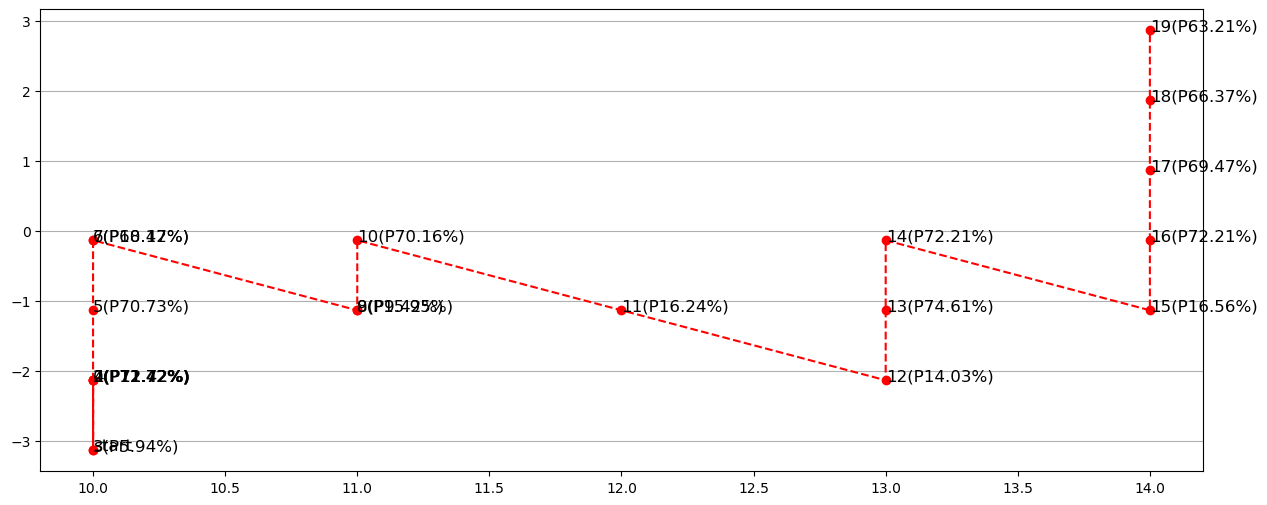

In [41]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()

In [42]:
# episode.agent.action_history

# TRAIN Policy
----

In [ ]:
config = Config()
start_state = State.create_from(
    config=config,
    id="earth",
    x=random.uniform(config.world_min_x, config.world_max_x),
    y=random.uniform(config.world_min_y, config.world_max_y),
)
policy = Policy(config=config)

# each episode iteration is always starting from the same state
episodes = []
for iteration in range(config.iterations):
    episode = Episode.create_from_state(state=start_state)
    episode.train(steps=config.episode_steps, policy=policy, debug=False)
    episodes.append(episode)
print(f"episode gain: {episode.gain()}")

episode gain: -12.0


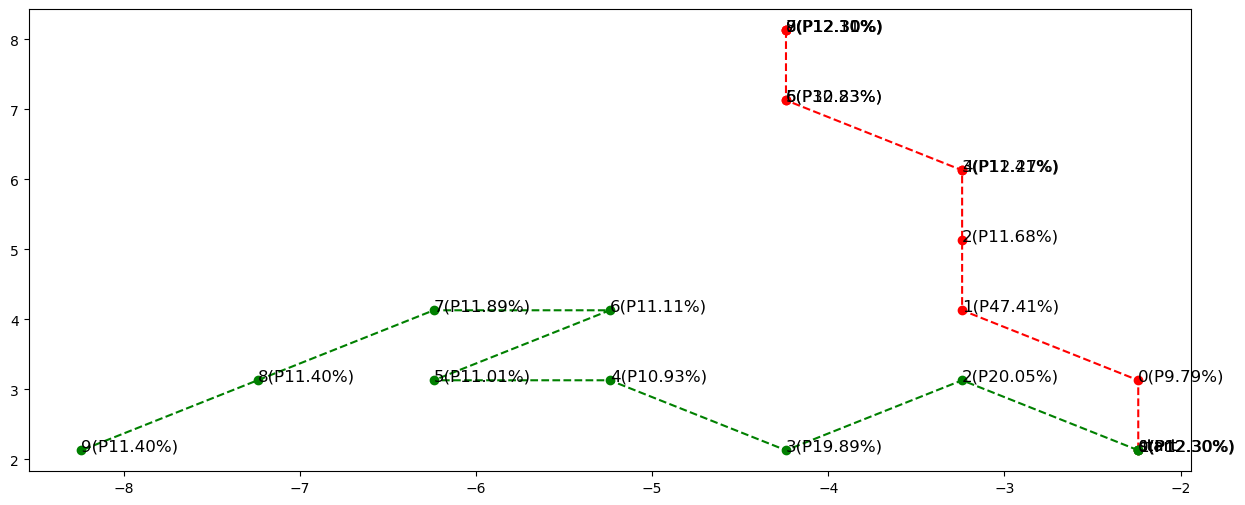

In [44]:
def get_color(idx: int):
    colors = ["red", "green", "blue", "gray"]
    return colors[idx % len(colors)]


fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
for idx, episode in enumerate(episodes):
    episode.viz(ax=ax, color=get_color(idx))
plt.show()

In [45]:
episodes

[Episode(config=<src.config.Config object at 0x16e5ea8d0>, world=World(x_min=-10.0, x_max=10.0, y_min=-10.0, y_max=10.0), agent=Agent(id='earth', state=State(config=<src.config.Config object at 0x16e5ea8d0>, id='earth', x=-2.240011871449859, y=2.130859644762401), action_history=[Action(possible_actions=[(-1.0, -1.0), (-1.0, 0.0), (-1.0, 1.0), (0.0, -1.0), (0.0, 0.0), (0.0, 1.0), (1.0, -1.0), (1.0, 0.0), (1.0, 1.0)], action_idx=tensor([5]), prob=tensor([0.0979], grad_fn=<IndexBackward0>)), Action(possible_actions=[(-1.0, -1.0), (-1.0, 0.0), (-1.0, 1.0), (0.0, -1.0), (0.0, 0.0), (0.0, 1.0), (1.0, -1.0), (1.0, 0.0), (1.0, 1.0)], action_idx=tensor([2]), prob=tensor([0.4741], grad_fn=<IndexBackward0>)), Action(possible_actions=[(-1.0, -1.0), (-1.0, 0.0), (-1.0, 1.0), (0.0, -1.0), (0.0, 0.0), (0.0, 1.0), (1.0, -1.0), (1.0, 0.0), (1.0, 1.0)], action_idx=tensor([5]), prob=tensor([0.1168], grad_fn=<IndexBackward0>)), Action(possible_actions=[(-1.0, -1.0), (-1.0, 0.0), (-1.0, 1.0), (0.0, -1.0), 